In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

In [36]:
def guassian_kernel(x, h = 1):
    """
    Guassian Kernel based on wikipedia 
    h is bandwidth
    """
    return 1/np.sqrt(2 * np.pi * h ** 2) * np.exp(-(x**2) / (2*(h**2)))

In [8]:
def kde_uni(X, kernel, bandwidth = 1,):
    """
    Univariate KDE function
    Use this to test your kernels
    X: input data
    kernel: kernel function, see guassian_kernel
    bandwidth: smoothing parameter
    """
    n = X.shape[0]
    return lambda y : 1 / (n * bandwidth) * sum([kernel(y - X[i], bandwidth) for i in range(n)])

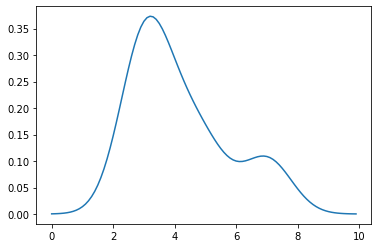

In [66]:
#example code for a univariate KDE using guassian kernel
#bandwith adjusts the smoothness of the estimate
X = np.array([3,4,5,3,3,7])
guas_kde = kde_uni(X, guassian_kernel, bandwidth=0.8)
x = np.arange(0,10,0.1)
plt.plot(x, guas_kde(x))

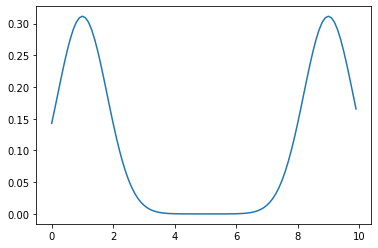

In [67]:
#example code for a univariate KDE using guassian kernel
#bandwith adjusts the smoothness of the estimate
X = np.array([1,1,1,1,9,9,9,9])
guas_kde = kde_uni(X, guassian_kernel, bandwidth=0.8)
x = np.arange(0,10,0.1)
plt.plot(x, guas_kde(x))

In [88]:
#Some kernels from the sklearn website
#These don't work as they are missing the scaling factor which I couldn't find in their source code
def guassian_kernel_skver(x, h = 1):
    """
    Basic Guassian Kernel, based on how sklearn implements it
    """
    return np.exp(-(x**2) / (2*(h**2))) 
def epanechnikov_kernel(x, h = 1):
    """
    Epanechnikov Kernel
    Support: |u| <= 1
    """
    return 1/h * 3/4 * (1 - (x ** 2 / h ** 2))
def exponential_kernel(x, h = 1):
    """
    Exponential Kernel
    Support: |u| <= 1
    """
    return 1/h * (1 - np.exp(-x / h))

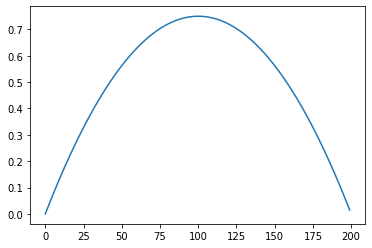

In [90]:
#plot epanechnikov kernel
x = np.arange(-1,1,0.01)
y = epanechnikov_kernel(x, h=1)
plt.plot(y)

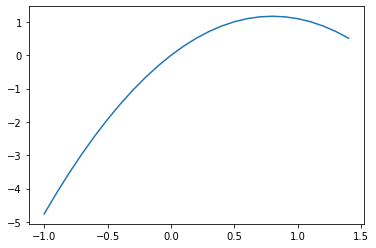

In [95]:
#testing epanechnikov kernel
X = np.array([0.8,0.8,0.8,0.8,0.8])
guas_kde = kde_uni(X, epanechnikov_kernel, bandwidth=0.8)
x = np.arange(-1,1.5,0.1)
plt.plot(x, guas_kde(x))

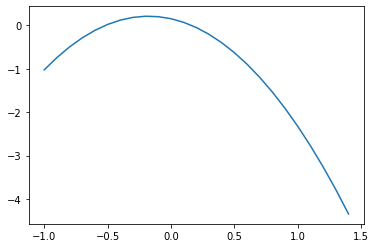

In [96]:
#testing epanechnikov kernel
X = np.array([-0.8,-0.8,-0.8,-0.8,-0.8, 0.3,0.3,0.9,.9])
guas_kde = kde_uni(X, epanechnikov_kernel, bandwidth=0.8)
x = np.arange(-1,1.5,0.1)
plt.plot(x, guas_kde(x))

In [32]:
class KDE(object):
    """
    Multi-Dim KDE
    data: Data
    kernel: kernel function should be like the ones above
    
    Uses silverman's rule of thumb to add choose the bandwidth
    """
    
    def __init__(self,data,kernel):
        self.dataset = data
        self.kernel = kernel
        self.silverman()
        self.kde = self.get_kde()
        
    def change_kernel(self, kernel):
        self.silverman()
        self.kde = self.get_kde()
        
    def k_H(self,y,x,d):
        H_det = np.linalg.det(self.H) ** (-1/2)
        return H_det * np.prod([self.kernel(y[j] - x[j]) / self.H[j,j] for j in range(d)])

    def k(self,y,x):
        return self.kernel(np.linalg.norm(y - x, ord = 2))
    
    def get_kde(self):
        n,d = self.dataset.shape
        return lambda y : 1 / n * sum([self.k_H(y,self.dataset[i],d) for i in range(n)])
    
    def eval(self, data):
        n,d = data.shape
        density = np.zeros(n)
        for i in range(n):
            density[i] = self.kde(data[i])
        return density
    
    def silverman(self):
        n,d = self.dataset.shape
        H = np.zeros((d,d))
        const = (4 / (d + 2)) ** (1 / (d + 4)) * n ** (-1 / (d + 4))
        for i in range(d):
            H[i,i] = const * np.std(self.dataset[:,i])
        self.H = H

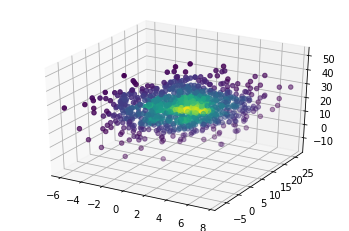

In [56]:
#example using guassian kernel defined above
mu=np.array([1,10,20])
sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data

test = KDE(values,guassian_kernel)
density = test.eval(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values.T
ax.scatter(x, y, z, c=density)
plt.show()

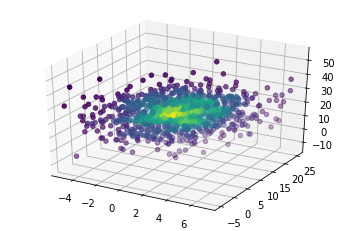

In [58]:
#example using guassian kernel from sklearn, missing scalar?
mu=np.array([1,10,20])
sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data

test = KDE(values,guassian_kernel_skver)
density = test.eval(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values.T
ax.scatter(x, y, z, c=density)
plt.show()

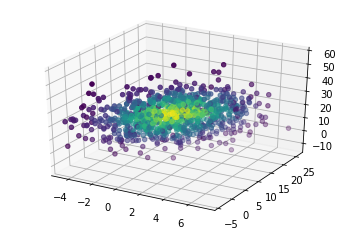

In [31]:
# sklearn kde example on same data from same distr
# there's is faster :( cuz it uses ball trees
# also it randomly doesn't work sometimes and gives a lin alg error idk 
mu=np.array([1,10,20])
sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()